In [6]:
import numpy as np
from numpy import array, random, dot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Training Data

In [8]:
X, Y = datasets.make_moons()

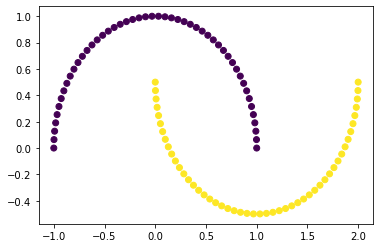

In [9]:
plt.scatter(X[:, 0], X[:, 1],c=[Y], cmap='viridis')
plt.show()

In [ ]:
# backward
dA =   - np.array([Y[i], 1 - Y[i]]) / A # vector form
dZ1 = [a1 * (1-a1), - a1*a2]
dZ2 = [- a1*a2, a2 * (1-a2)]

dZ = np.array([dZ1,dZ2])
dW = np.outer(dot(dA , dZ) , x) # outer product [1x2] x [1x2] => [2x2]
db = dot(dA , dZ) * 1


## Neurons
- 2 neurons
- Z = W.X + B
- A = softmax(Z)
- loss : 
    - softmax cross-entropy, CE = - sum(y_c * log(A_c)) where c is the class propability
    - == - dot_product(y , log(A))

- dloss/dA Vector form: 
    - dL/dA = - (dL/dA1 , dL/dA2)
    - dL/dA = - (dA1 , dA2) simplified vector form
    - dA1 = - y1/A1, dA2 = - y1/A2,
    - dCE = - ( y / A )
    - we will keep the vector form of dL/dA for later multiplications
    
- dA/dZ :
    - d/dZ = (dZ1, dZ2) simplified vector form
    - dZ1 = (a1*(1-a1),  - aj * a1)
    - dZ2 = (- a2 * a1, a2*(1-a2))
    - (... ... ...)nxn matrix (i = row index, j = column index)
        - with diagonals => ai * (1-ai)
        - otherwise => -ai*aj
- dZ/dW = X
- dZ/dB = 1

## Shapes
- input = 1x2
- W = 2x2, B = 1x2
- Z = 1x2
- A = 1x2

In [2]:
def softmax(z):
    # Not Stable, x minus x_max better
    exp_outputs = np.exp(z)
    probabilities = exp_outputs / np.sum(exp_outputs, axis=1, keepdims=True)
    return probabilities

In [126]:
def training(X, Y, lr = 0.01, epochs = 10):
    W = np.random.uniform(-1,1, size=(2,2))
    b = np.random.uniform(-1,1, size=(1,2))

    Z = np.zeros(shape=(1,2))
    A = np.zeros(shape=(1,2))
    
    epoch_loss = []
    
    for epoch in range(epochs):
        epoch_loss.append(0)
        for i, x in enumerate(X):
            
            # forward
            Z = dot(x, W.T) + b
            A = softmax(Z).flatten()
            
            a1 = A[0]
            a2 = A[1]
            
            # loss
            loss_i = - dot([Y[i], 1- Y[i]], np.log(A).T) # CE
            
            # backward
            dA =   - np.array([Y[i], 1 - Y[i]]) / A # vector form
            dZ1 = [a1 * (1-a1), - a1*a2]
            dZ2 = [- a1*a2, a2 * (1-a2)]
            
            dZ = np.array([dZ1,dZ2])
            dW = np.outer(dot(dA , dZ) , x) # outer product [1x2] x [1x2] => [2x2]
            db = dot(dA , dZ) * 1
        
            W = W - lr * dW
            b = b - lr * db
            epoch_loss[epoch] += loss_i
            
        #print(epoch_loss[-1])
    plt.plot(epoch_loss)
    print('last loss', epoch_loss[-1])
    return W, b

last loss 26.153869235880922


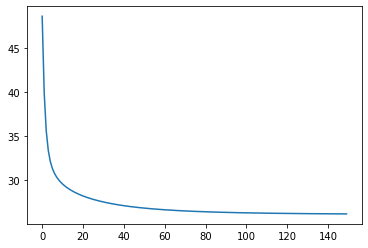

In [130]:
W, b = training(X, Y, lr = 0.01, epochs=150)

In [131]:
def evaluate(X, W, b):
    y_hat = []
    for i, x in enumerate(X):
        Z = dot(x, W.T) + b
        A = softmax(Z)
        y_hat.append(np.argmax(A))
        
    return np.array(y_hat)

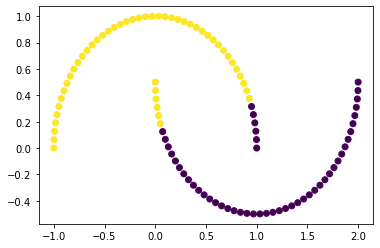

In [132]:
y_hat= evaluate(X, W, b)
plt.scatter(X[:, 0], X[:, 1],c=[y_hat])
plt.show()